In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt

import okama as ok

pd.options.display.float_format = '{:,.4f}'.format
plt.rcParams['figure.figsize'] = [12.0, 6.0]

%load_ext autoreload
%autoreload 2

ccy='RUB'

### VAST portfolios main indexes and assets for long term

In [8]:
ls = ['SBGB.MOEX']
x = ok.AssetList(ls, ccy=ccy, inflation=False)
x.describe()

,property,period,SBGB.MOEX
0,Compound return,YTD,-0.9903
1,CAGR,1 years,-0.9902
2,CAGR,5 years,NaN
3,CAGR,10 years,NaN
4,CAGR,"2 years, 5 months",-0.8389
5,Dividend yield,LTM,0.0000
6,Risk,"2 years, 5 months",0.5251
7,CVAR,"2 years, 5 months",0.9902
8,Max drawdowns,"2 years, 5 months",-0.9903
9,Max drawdowns dates,"2 years, 5 months",2021-06


In [1]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US']
x = ok.AssetList(ls, ccy=ccy, inflation=False)

NameError: name 'ok' is not defined

In [4]:
x.assets_first_dates

{'RUB': Timestamp('1992-08-01 00:00:00'),
 'SPY.US': Timestamp('1993-02-01 00:00:00'),
 'LQD.US': Timestamp('2002-08-01 00:00:00'),
 'RGBITR.INDX': Timestamp('2003-01-01 00:00:00'),
 'MCFTR.INDX': Timestamp('2003-03-01 00:00:00'),
 'GLD.US': Timestamp('2004-12-01 00:00:00'),
 'PGJ.US': Timestamp('2005-01-01 00:00:00')}

<AxesSubplot:>

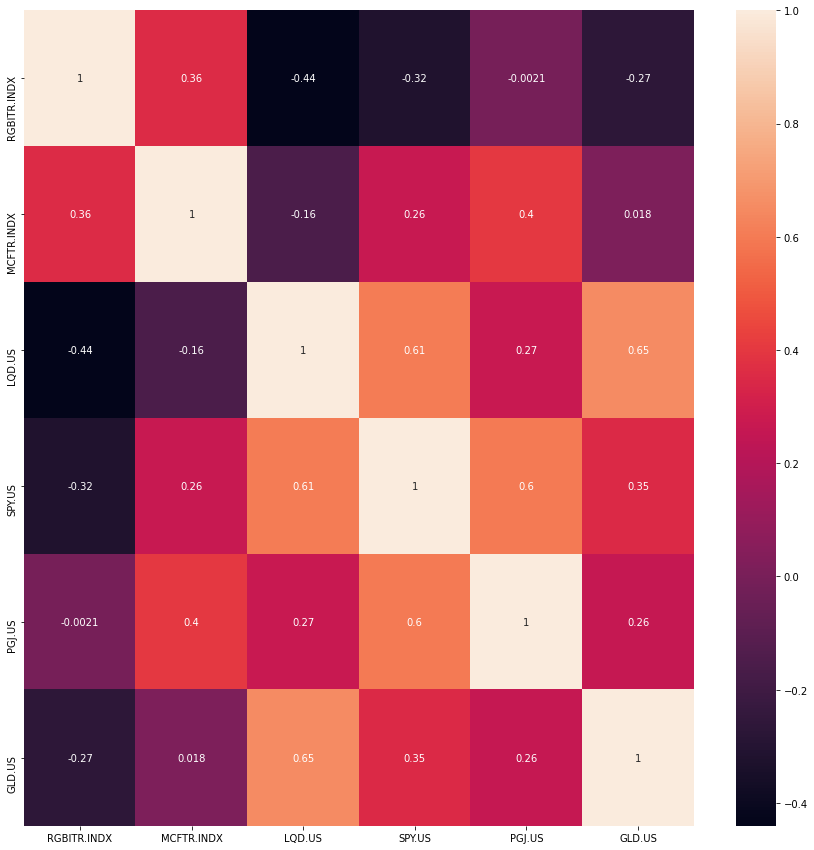

In [5]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(x.ror.corr(), annot=True, ax=ax)

In [7]:
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False).ef_points

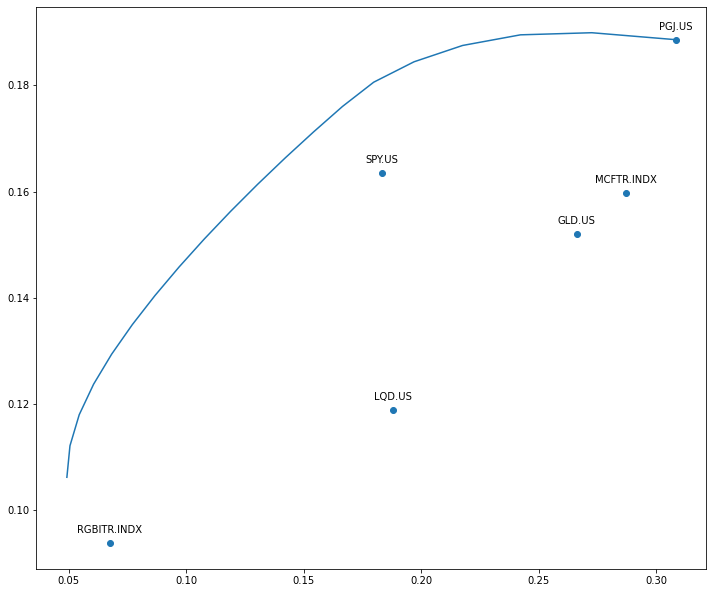

In [9]:
# Frontier drawing
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(ls, ccy=ccy).plot_assets(kind='cagr')
ax = plt.gca()
#ax.plot(ef.Risk, ef.Return)
ax.plot(ef.Risk, ef['CAGR'])

In [7]:
#dir(ok.Plots())

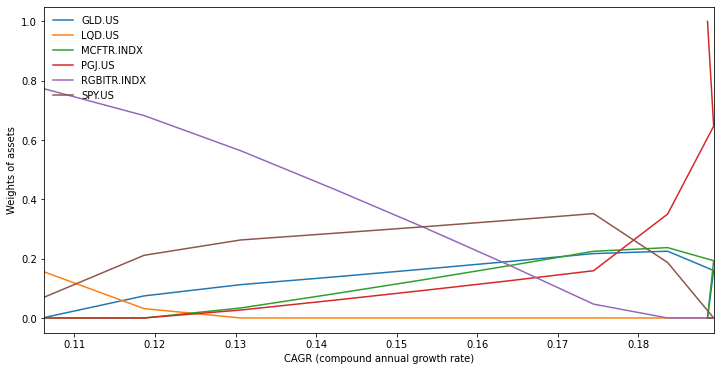

<Figure size 864x432 with 0 Axes>

In [10]:
map = ok.Plots(ls, ccy=ccy).plot_transition_map()

In [11]:
#Limitations:
#conservate	SPY>6%, RusBonds<55%, UsReit>4%, Gold>5%, China>4%
#balanced	Gold<15%, UsReit>6%, UsBonds>5%
#aggressive	Gold<15%, RusBonds>6%, UsBonds>5%, UsReit<12%

## Консервативный портфель

### limits: RusShares>6%, Gold>5%

In [9]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US']
bounds = [ (0, 1),     (.06, 1),   (0, 1), (.0, 1),   (.05, 1), (0, .05)]
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False, bounds=bounds)
# ef.minimize_risk(target_return=.1245, tolerance=1e-10)
ef.minimize_risk(target_return=.1263, tolerance=1e-10)

{'RGBITR.INDX': 0.610633174628923,
 'MCFTR.INDX': 0.06,
 'LQD.US': 0.0942398023325242,
 'SPY.US': 0.13512702303855273,
 'PGJ.US': 0.05,
 'GLD.US': 0.05,
 'Mean return': 0.12630000000000097,
 'CAGR': 0.12448647042780969,
 'Risk': 0.06420050100363153}

##### ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US']
##### [.61, .06, .08, .2, 0, .05]

In [2]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US']
cons_weights=[.61, .06, .09, .14, .05, .05]
port_cons_no_infl = ok.Portfolio(ls, ccy=ccy, weights=cons_weights, inflation=False)
port_cons = ok.Portfolio(ls, ccy=ccy, weights=cons_weights, inflation=True)
port_cons.describe()

,property,rebalancing,period,portfolio,inflation
0,compound return,1 year,YTD,-0.0096,0.0212
1,CAGR,1 year,1 years,0.1665,0.0572
2,CAGR,1 year,5 years,0.1247,0.0402
3,CAGR,1 year,10 years,0.1386,0.0613
4,CAGR,1 year,16.2 years,0.1300,0.0784
5,CAGR,1 month,16.2 years,0.1243,0.0784
6,CAGR,Not rebalanced,16.2 years,0.1250,0.0784
7,Dividend yield (USD),1 month,LTM,0.0136,NaN
8,Dividend yield (RUB),1 month,LTM,0.0000,NaN
9,Risk,1 month,16.2 years,0.0643,NaN


In [5]:
funarium_ls = ['SBGB.MOEX', 'VTBX.MOEX', 'BND.US', 'VOO.US', 'GLDM.US']
funarium_cons_weights=[.61, .06, .09, .19, .05]
funarium_port_cons_no_infl = ok.Portfolio(funarium_ls, ccy=ccy, weights=funarium_cons_weights, inflation=False)
funarium_port_cons_no_infl.table.to_csv('finarium_const_table.csv', encoding='windows-1251', index=False)
funarium_port_cons_no_infl.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.6100
1,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.0600
2,Vanguard Total Bond Market Index Fund ETF Shares,BND.US,0.0900
3,Vanguard S&P 500 ETF,VOO.US,0.1900
4,SPDR Gold MiniShares,GLDM.US,0.0500


In [12]:
port_cons.get_cagr()

portfolio   0.1243
RUB.INFL    0.0784
dtype: float64

In [13]:
port_cons.real_cagr

0.042554938118304575

In [14]:
port_cons_no_infl.describe()

,property,rebalancing,period,portfolio
0,compound return,1 year,YTD,0.0042
1,CAGR,1 year,1 years,0.1360
2,CAGR,1 year,5 years,0.1275
3,CAGR,1 year,10 years,0.1397
4,CAGR,1 year,16.3 years,0.1303
5,CAGR,1 month,16.3 years,0.1246
6,CAGR,Not rebalanced,16.3 years,0.1258
7,Dividend yield (RUB),1 month,LTM,0.0000
8,Dividend yield (USD),1 month,LTM,0.0131
9,Risk,1 month,16.3 years,0.0641


In [30]:
port_cons_no_infl.forecast_monte_carlo_cagr(distr='lognorm', years=1, percentiles=[2.2],n=5000000) # 2.2%

{2.2: 1.8046038771334907e-05}

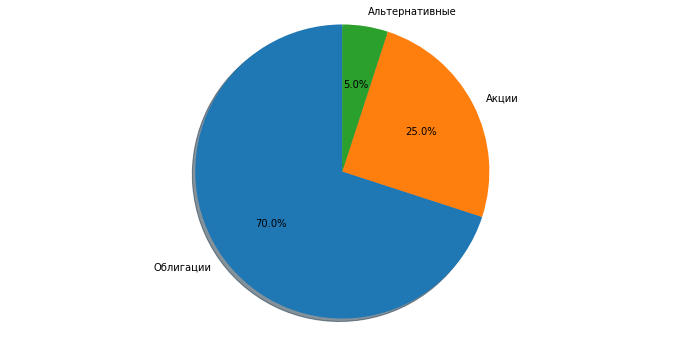

In [15]:
classes_labels = ('Облигации', 'Акции', 'Альтернативные')
classes_weights = [.70, .25, .05]
fig1, ax1 = plt.subplots()
ax1.pie(classes_weights, labels=classes_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=True)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

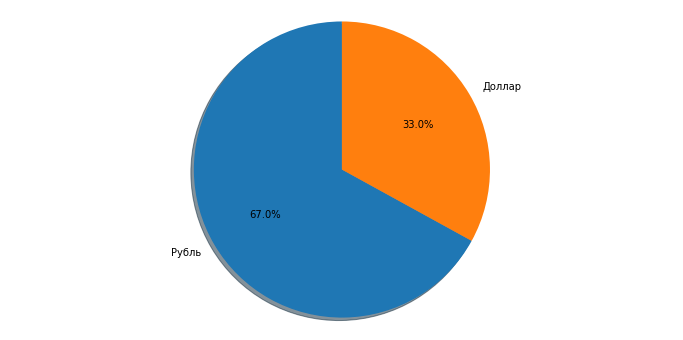

In [16]:
currency_labels = ('Рубль', 'Доллар')
currency_weights = [.67, .33]
fig1, ax1 = plt.subplots()
ax1.pie(currency_weights, labels=currency_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=True)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

<AxesSubplot:ylabel='Просадка портфеля, %'>

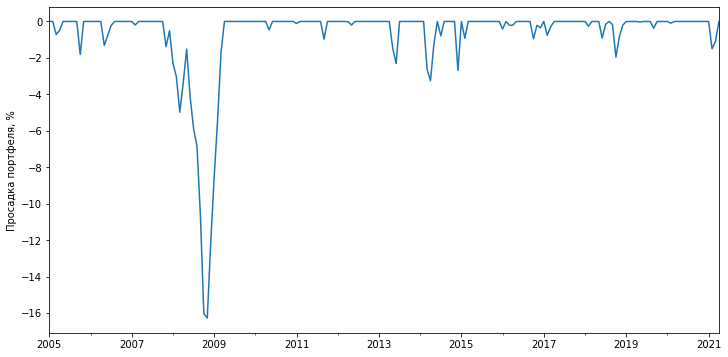

In [17]:
drowdown_formated = port_cons_no_infl.drawdowns * 100
drowdown_formated.plot(ylabel="Просадка портфеля, %", figsize=(12,6))

Text(0, 10, 'Портфель')

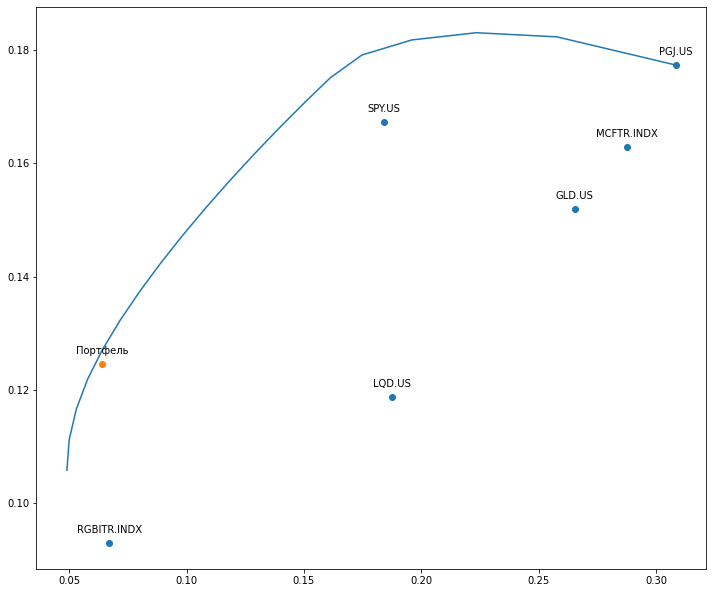

In [18]:
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False).ef_points
# Рисуем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(ls, ccy=ccy).plot_assets(kind='cagr')
ax = plt.gca()
ax.plot(ef.Risk, ef['CAGR'])
ax.scatter(port_cons_no_infl.risk_annual, port_cons_no_infl.get_cagr())
ax.annotate("Портфель",  # this is the text
                        (port_cons_no_infl.risk_annual, port_cons_no_infl.get_cagr()),  # this is the point to label
                        textcoords="offset points",  # how to position the text
                        xytext=(0, 10),  # distance from text to points (x,y)
                        ha='center')  # horizontal alignment can be left, right or center

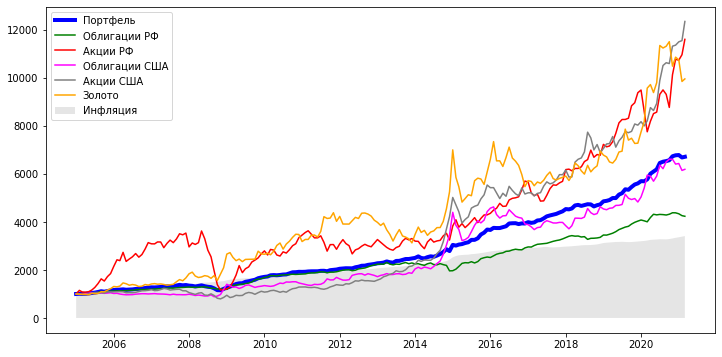

In [3]:
df = port_cons.wealth_index_with_assets
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['portfolio'], color = 'blue', linewidth = 4, label='Портфель')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'green', label='Облигации РФ')
ax.plot(df.index.to_timestamp(), df['MCFTR.INDX'], color = 'red', label='Акции РФ')
ax.plot(df.index.to_timestamp(), df['LQD.US'], color = 'magenta', label='Облигации США')
ax.plot(df.index.to_timestamp(), df['SPY.US'], color = 'grey', label='Акции США')
ax.plot(df.index.to_timestamp(), df['GLD.US'], color = 'orange', label='Золото')
# ax.plot(df.index.to_timestamp(), df['PGJ.US'], color = 'purple', label='Акции Китая')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')
leg = ax.legend()

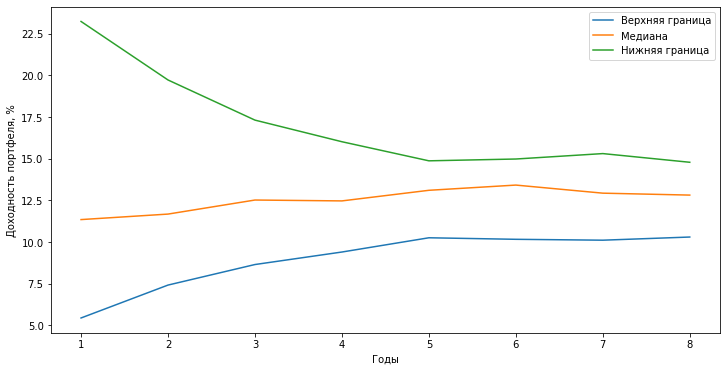

In [20]:
ax = plt.axes()
ax.set_xlabel('Годы')
ax.set_ylabel('Доходность портфеля, %')
ax.plot(port_cons_no_infl.percentile_from_history(years=8)*100)
ax.legend(['Верхняя граница', 'Медиана', 'Нижняя граница'])

<Figure size 864x432 with 0 Axes>

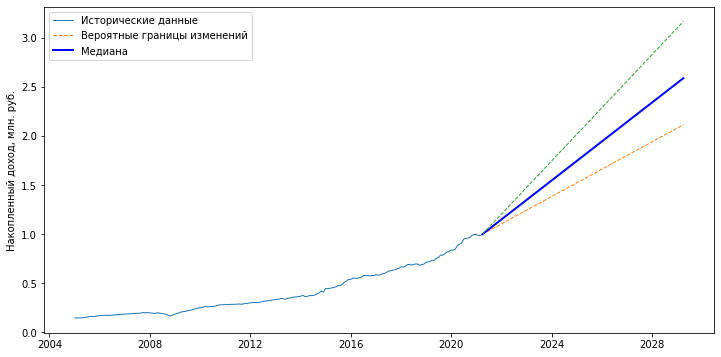

In [21]:
fig = plt.figure(figsize=(12,6))
port_cons_no_infl.plot_forecast(years=8, n=1000, today_value=1, percentiles=[10,50,90])
ax = plt.gca()
#ax.set_xlabel('Период инвестиций')
ax.set_ylabel('Накопленный доход, млн. руб.')
ax.legend(['Исторические данные', 'Вероятные границы изменений', 'Медиана'])

#### Диверсифицированный консервативный

In [22]:
ls_class = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US']
cons_weights_class=[.61, .06, .09, .14, .05, .05]
ls_cons_div = ['SBGB.MOEX', 'SBRB.MOEX', 'RUSB.MOEX', 'VTBX.MOEX', 'VCIT.US', 'VCLT.US', 'VOO.US', 'VB.US', 'PGJ.US', 'GLDM.US']
weights_cons_div = [  .23,          .23,       .15,           .06,       .06,       .03,      .10,     .04,      .05,       .05]
cons_div = ok.Portfolio(ls_cons_div, ccy=ccy, weights=weights_cons_div)
cons_div.table.to_csv('cons_table.csv', encoding='windows-1251', index=False)
cons_div.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.2300
1,SBRB,SBRB.MOEX,0.2300
2,ITI Funds UCITS ETF SICAV - ITI Funds Russia-F...,RUSB.MOEX,0.1500
3,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.0600
4,Vanguard Intermediate-Term Corporate Bond Inde...,VCIT.US,0.0600
5,Vanguard Long-Term Corporate Bond Index Fund E...,VCLT.US,0.0300
6,Vanguard S&P 500 ETF,VOO.US,0.1000
7,Vanguard Small-Cap Index Fund ETF Shares,VB.US,0.0400
8,Invesco Golden Dragon China ETF,PGJ.US,0.0500
9,SPDR Gold MiniShares,GLDM.US,0.0500


In [23]:
cons_div.dividend_yield

,RUB,USD
2020-04,0.0000,0.0008
2020-04,0.0000,0.0008
2020-04,0.0000,0.0008
2020-04,0.0000,0.0008
2020-04,0.0000,0.0008
...,...,...
2021-03,0.0000,0.0142
2021-03,0.0000,0.0142
2021-03,0.0000,0.0142
2021-03,0.0000,0.0142


## Сбалансированный портфель

### Limits: UsBonds>6%, Gold<12%, UsReit>6%

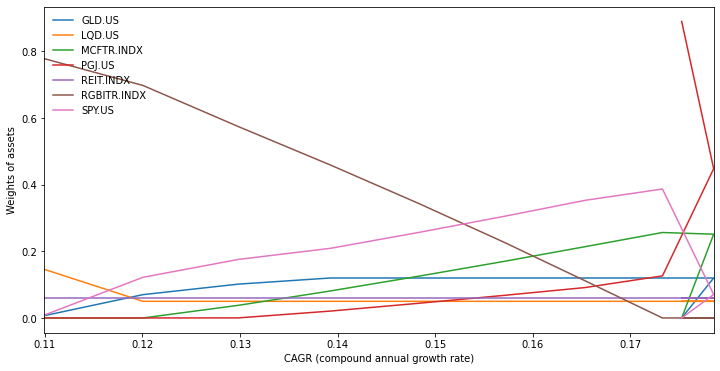

<Figure size 864x432 with 0 Axes>

In [54]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
bounds = (   (0, 1),       (0, 1), (.05, 1),  (0, 1),   (0, 1), (0, .12), (.06, 1))
map = ok.Plots(ls, ccy=ccy, last_date='2020-11').plot_transition_map(bounds=bounds)

In [61]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
bounds = [ (0, 1),         (0, 1),   (.06, 1),   (0, 1),    (0, 1),   (0, .12), (.03, 1)]
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False, bounds=bounds)
ef.minimize_risk(target_return=.1521, tolerance=1e-10) # Search CagrBalanced = 14,75% 

{'RGBITR.INDX': 0.3478627146251499,
 'MCFTR.INDX': 0.12129509604092065,
 'LQD.US': 0.06000000000000003,
 'SPY.US': 0.23279279655783272,
 'PGJ.US': 0.08804939277609665,
 'GLD.US': 0.12,
 'REIT.INDX': 0.03,
 'Mean return': 0.15209999999999924,
 'CAGR': 0.14752243499922302,
 'Risk': 0.10349520488448712}

##### ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
#####        [   .35,          .12,      .06,      .23,      .09,      .12,         .03]

In [5]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
bal_weights=[   .35,          .12,      .06,      .23,      .09,      .12,         .03]
port_bal = ok.Portfolio(ls, ccy=ccy, weights=bal_weights, inflation=True)
port_bal_no_infl = ok.Portfolio(ls, ccy=ccy, weights=bal_weights, inflation=False)
port_bal_no_infl.describe()

,property,rebalancing,period,portfolio
0,compound return,1 year,YTD,0.0327
1,CAGR,1 year,1 years,0.2365
2,CAGR,1 year,5 years,0.1520
3,CAGR,1 year,10 years,0.1698
4,CAGR,1 year,16.3 years,0.1559
5,CAGR,1 month,16.3 years,0.1482
6,CAGR,Not rebalanced,16.3 years,0.1446
7,Dividend yield (USD),1 month,LTM,0.0091
8,Dividend yield (RUB),1 month,LTM,0.0000
9,Risk,1 month,16.3 years,0.1029


In [25]:
finarium_ls = ['SBGB.MOEX', 'VTBX.MOEX', 'BND.US', 'VOO.US', 'GLDM.US']
finarium_bal_weights=[ .35,         .12,      .06,      .35,       .12]
finarium_port_bal_no_infl = ok.Portfolio(finarium_ls, ccy=ccy, weights=finarium_bal_weights, inflation=False)
finarium_port_bal_no_infl.table.to_csv('finarium_bal_table.csv', encoding='windows-1251', index=False)
finarium_port_bal_no_infl.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.3500
1,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.1200
2,Vanguard Total Bond Market Index Fund ETF Shares,BND.US,0.0600
3,Vanguard S&P 500 ETF,VOO.US,0.3500
4,SPDR Gold MiniShares,GLDM.US,0.1200


In [65]:
port_bal.real_cagr

0.06400561272309058

Text(0, 10, 'Портфель')

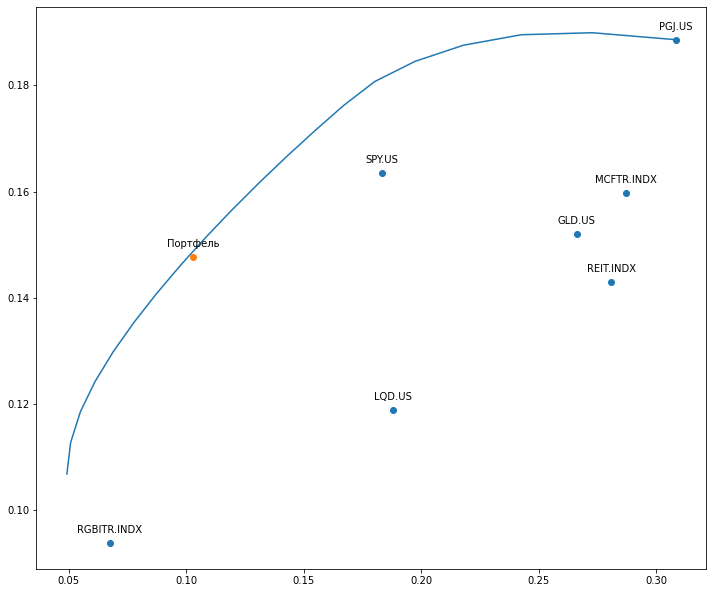

In [63]:
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False).ef_points
# Рисуем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(ls, ccy=ccy).plot_assets(kind='cagr')
ax = plt.gca()
ax.plot(ef.Risk, ef['CAGR'])
ax.scatter(port_bal_no_infl.risk_annual, port_bal_no_infl.get_cagr())
ax.annotate("Портфель",  # this is the text
                        (port_bal_no_infl.risk_annual, port_bal_no_infl.get_cagr()),  # this is the point to label
                        textcoords="offset points",  # how to position the text
                        xytext=(0, 10),  # distance from text to points (x,y)
                        ha='center')  # horizontal alignment can be left, right or center

In [73]:
port_bal.get_cagr()

portfolio   0.1474
RUB.INFL    0.0784
dtype: float64

In [74]:
port_bal.real_cagr

0.06400561272309058

In [84]:
port_bal_no_infl.forecast_monte_carlo_cagr(distr='lognorm', years=1, percentiles=[5.97], n=5000000) # 6.0%

{5.97: -2.1752494975096646e-06}

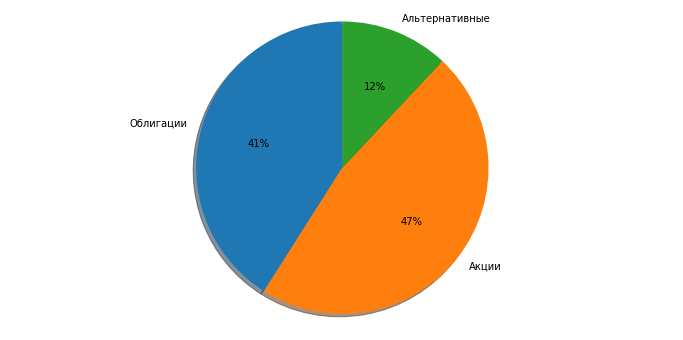

In [10]:
classes_labels=['Облигации','Акции','Альтернативные']
classes_weights = [.41, .47, .12]
fig1, ax1 = plt.subplots()
ax1.pie(classes_weights, labels=classes_labels, autopct='%1.0f%%',
        shadow=True, startangle=90, normalize=True)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

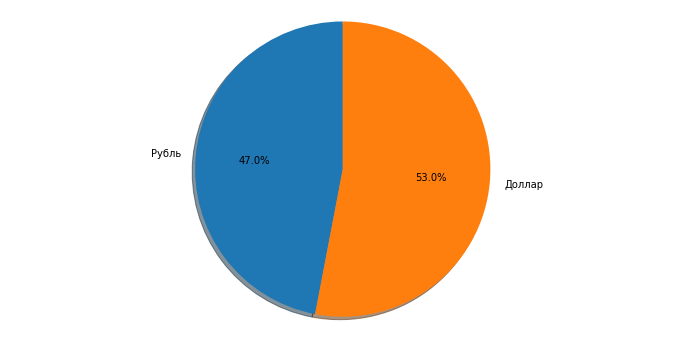

In [85]:
currency_labels=['Рубль','Доллар']
currency_weights = [.47, .53]
fig1, ax1 = plt.subplots()
ax1.pie(currency_weights, labels=currency_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=True)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

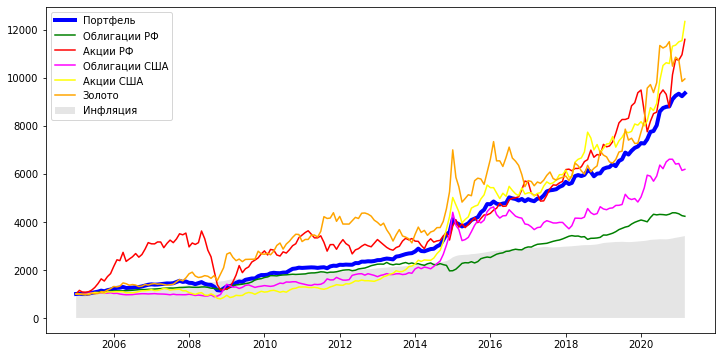

In [6]:
df = port_bal.wealth_index_with_assets
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['portfolio'], color = 'blue', linewidth = 4, label='Портфель')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'green', label='Облигации РФ')
ax.plot(df.index.to_timestamp(), df['MCFTR.INDX'], color = 'red', label='Акции РФ')
ax.plot(df.index.to_timestamp(), df['LQD.US'], color = 'magenta', label='Облигации США')
ax.plot(df.index.to_timestamp(), df['SPY.US'], color = 'yellow', label='Акции США')
ax.plot(df.index.to_timestamp(), df['GLD.US'], color = 'orange', label='Золото')
# ax.plot(df.index.to_timestamp(), df['REIT.INDX'], color = 'brown', label='Недвижимость США')
# ax.plot(df.index.to_timestamp(), df['PGJ.US'], color = 'purple', label='Акции Китая')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')
leg = ax.legend()

<AxesSubplot:ylabel='Просадка портфеля, %'>

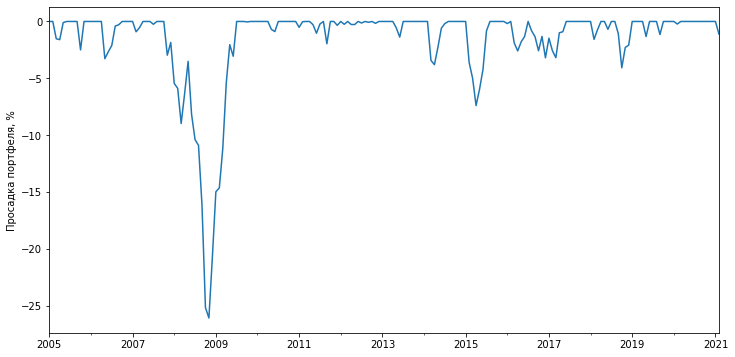

In [87]:
drawdouns_pct = port_bal.drawdowns*100
drawdouns_pct.plot(xlabel='', ylabel="Просадка портфеля, %", figsize=(12,6))

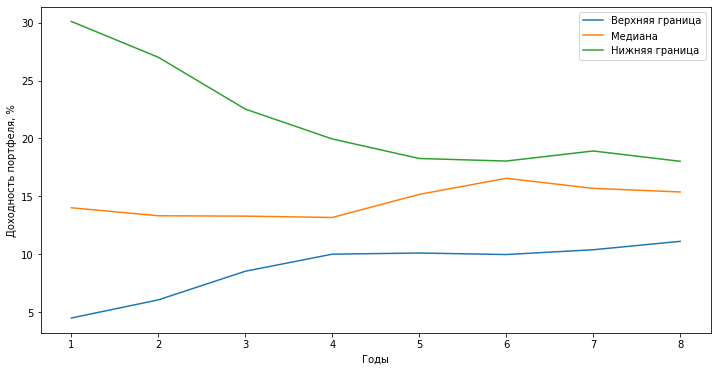

In [88]:
ax = plt.axes()
ax.set_xlabel('Годы')
ax.set_ylabel('Доходность портфеля, %')
ax.plot(port_bal_no_infl.percentile_from_history(years=8)*100)
ax.legend(['Верхняя граница', 'Медиана', 'Нижняя граница'])

<Figure size 864x432 with 0 Axes>

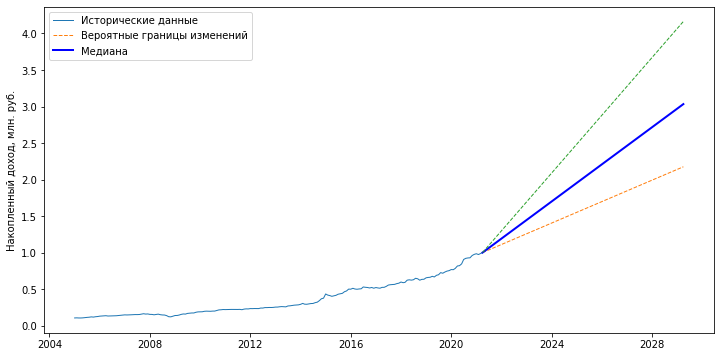

In [92]:
fig = plt.figure(figsize=(12,6))
port_bal_no_infl.plot_forecast(years=8, n=1000, today_value=1, percentiles=[10,50,90])
ax = plt.gca()
ax.set_ylabel('Накопленный доход, млн. руб.')
ax.legend(['Исторические данные', 'Вероятные границы изменений', 'Медиана'])

#### Диверсифицированный сбалансированный

In [10]:
ls_classes = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
bal_weights_classes=[   .35,          .12,      .06,      .23,      .09,      .12,         .03]
bal_div_ls = ['SBGB.MOEX', 'SBRB.MOEX', 'RUSB.MOEX', 'VTBX.MOEX', 'VCIT.US', 'VCLT.US', 'VOO.US', 'VB.US', 'PGJ.US', 'GLDM.US', 'SLV.US', 'VNQ.US']
bal_div_weights=[   0.09,         0.09,        0.17,       0.12,       .03,       .03,      .11,     .12,     0.09,     0.10,       .02,      .03]
bal_div = ok.Portfolio(bal_div_ls, ccy=ccy, weights=bal_div_weights)
bal_div.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.0900
1,SBRB,SBRB.MOEX,0.0900
2,ITI Funds UCITS ETF SICAV - ITI Funds Russia-F...,RUSB.MOEX,0.1700
3,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.1200
4,Vanguard Intermediate-Term Corporate Bond Inde...,VCIT.US,0.0300
5,Vanguard Long-Term Corporate Bond Index Fund E...,VCLT.US,0.0300
6,Vanguard S&P 500 ETF,VOO.US,0.1100
7,Vanguard Small-Cap Index Fund ETF Shares,VB.US,0.1200
8,Invesco Golden Dragon China ETF,PGJ.US,0.0900
9,SPDR Gold MiniShares,GLDM.US,0.1000


In [97]:
bal_div.dividend_yield

,RUB,USD
2020-04,0.0000,0.0004
2020-04,0.0000,0.0004
2020-04,0.0000,0.0004
2020-04,0.0000,0.0004
2020-04,0.0000,0.0004
...,...,...
2021-02,0.0000,0.0095
2021-02,0.0000,0.0095
2021-02,0.0000,0.0095
2021-02,0.0000,0.0095


In [98]:
bal_div.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.0900
1,SBRB,SBRB.MOEX,0.0900
2,ITI Funds UCITS ETF SICAV - ITI Funds Russia-F...,RUSB.MOEX,0.1700
3,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.1200
4,Vanguard Intermediate-Term Corporate Bond Inde...,VCIT.US,0.0300
5,Vanguard Long-Term Corporate Bond Index Fund E...,VCLT.US,0.0300
6,Vanguard S&P 500 ETF,VOO.US,0.1100
7,Vanguard Small-Cap Index Fund ETF Shares,VB.US,0.1200
8,Invesco Golden Dragon China ETF,PGJ.US,0.0900
9,SPDR Gold MiniShares,GLDM.US,0.1000


# Агрессивный портфель

### Подбор Gold<15%, UsBonds>7%, UsReit>6%

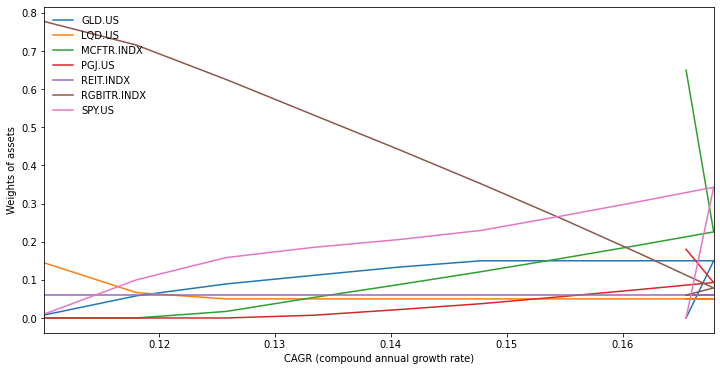

<Figure size 864x432 with 0 Axes>

In [6]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
bounds = ((.06, 1),       (0, 1), (.05, 1),  (0, 1),   (0, .18), (0, .15), (.06, 1))
map = ok.Plots(ls, ccy=ccy, last_date='2020-11').plot_transition_map(bounds=bounds)

In [21]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
bounds = ((.06, 1),        (0, 1), (.05, 1),   (.1, 1), (0, 1), (0, .15), (.06, 1))
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False, bounds=bounds)
ef.minimize_risk(target_return=.1837, tolerance=1e-10)

{'RGBITR.INDX': 0.06000000000000002,
 'MCFTR.INDX': 0.22691141893182892,
 'LQD.US': 0.05,
 'SPY.US': 0.2524116147659996,
 'PGJ.US': 0.20067696630217138,
 'GLD.US': 0.15,
 'REIT.INDX': 0.06000000000000007,
 'Mean return': 0.18370000000000108,
 'CAGR': 0.1725763801979059,
 'Risk': 0.1637612154907078}

##### ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
##### [0.06, 0.23, 0.05, 0.25, 0.20, 0.15, 0.06]

In [7]:
ls = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
aggr_weights=[0.06, 0.23, 0.05, 0.25, 0.20, 0.15, 0.06]
port_aggr_no_infl = ok.Portfolio(ls, ccy=ccy, weights=aggr_weights, inflation=False)
port_aggr = ok.Portfolio(ls, ccy=ccy, weights=aggr_weights, inflation=True)
port_aggr_no_infl.describe()

,property,rebalancing,period,portfolio
0,compound return,1 year,YTD,0.0609
1,CAGR,1 year,1 years,0.3730
2,CAGR,1 year,5 years,0.1827
3,CAGR,1 year,10 years,0.1982
4,CAGR,1 year,16.3 years,0.1840
5,CAGR,1 month,16.3 years,0.1734
6,CAGR,Not rebalanced,16.3 years,0.1615
7,Dividend yield (USD),1 month,LTM,0.0070
8,Dividend yield (RUB),1 month,LTM,0.0000
9,Risk,1 month,16.3 years,0.1631


In [26]:
finarium_ls = ['SBGB.MOEX', 'VTBX.MOEX', 'BND.US', 'VOO.US', 'GLDM.US']
finarium_aggr_weights=[ .06,        .23,      .05,      .51,       .15]
finarium_port_aggr_no_infl = ok.Portfolio(finarium_ls, ccy=ccy, weights=finarium_aggr_weights, inflation=False)
finarium_port_aggr_no_infl.table.to_csv('finarium_aggr_table.csv', encoding='windows-1251', index=False)
finarium_port_aggr_no_infl.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.0600
1,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.2300
2,Vanguard Total Bond Market Index Fund ETF Shares,BND.US,0.0500
3,Vanguard S&P 500 ETF,VOO.US,0.5100
4,SPDR Gold MiniShares,GLDM.US,0.1500


In [66]:
port_aggr.get_cagr()

portfolio   0.1726
RUB.INFL    0.0784
dtype: float64

In [67]:
port_aggr.real_cagr

0.08733163680779654

Text(0, 10, 'Портфель')

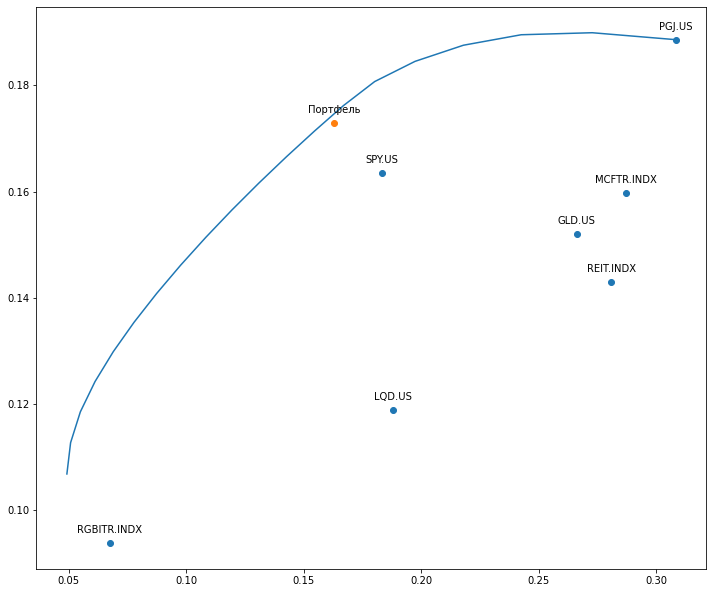

In [24]:
ef = ok.EfficientFrontier(ls, ccy=ccy, full_frontier=False).ef_points
# Рисуем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(ls, ccy=ccy).plot_assets(kind='cagr')
ax = plt.gca()
ax.plot(ef.Risk, ef['CAGR'])
ax.scatter(port_aggr_no_infl.risk_annual, port_aggr_no_infl.get_cagr())
ax.annotate("Портфель",  # this is the text
                        (port_aggr_no_infl.risk_annual, port_aggr_no_infl.get_cagr()),  # this is the point to label
                        textcoords="offset points",  # how to position the text
                        xytext=(0, 10),  # distance from text to points (x,y)
                        ha='center')  # horizontal alignment can be left, right or center

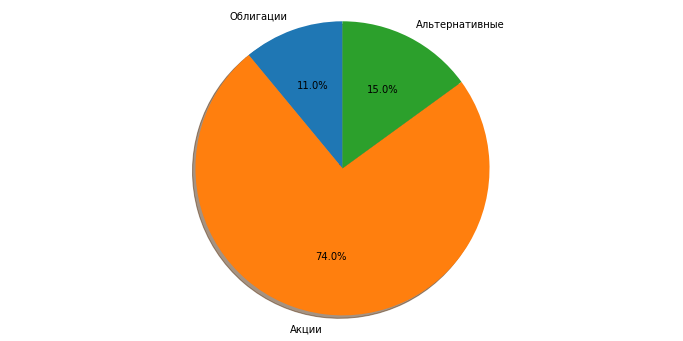

In [9]:
classes_labels = ('Облигации', 'Акции', 'Альтернативные')
classes_weights = [.11, .74, .15]
fig1, ax1 = plt.subplots()
ax1.pie(classes_weights, labels=classes_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=True)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

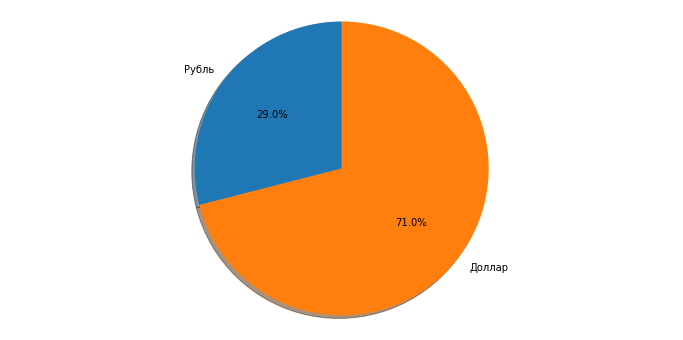

In [27]:
currency_labels = ('Рубль', 'Доллар')
currency_weights = [.29, .71]
fig1, ax1 = plt.subplots()
ax1.pie(currency_weights, labels=currency_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=True)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

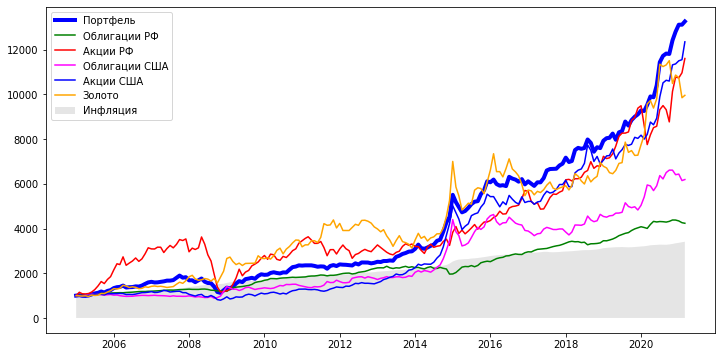

In [8]:
df = port_aggr.wealth_index_with_assets
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['portfolio'], color = 'blue', linewidth = 4, label='Портфель')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'green', label='Облигации РФ')
ax.plot(df.index.to_timestamp(), df['MCFTR.INDX'], color = 'red', label='Акции РФ')
ax.plot(df.index.to_timestamp(), df['LQD.US'], color = 'magenta', label='Облигации США')
ax.plot(df.index.to_timestamp(), df['SPY.US'], color = 'blue', label='Акции США')
ax.plot(df.index.to_timestamp(), df['GLD.US'], color = 'orange', label='Золото')
# ax.plot(df.index.to_timestamp(), df['REIT.INDX'], color = 'brown', label='Недвижимость США')
# ax.plot(df.index.to_timestamp(), df['PGJ.US'], color = 'purple', label='Акции Китая')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')
leg = ax.legend()

<AxesSubplot:ylabel='Просадка портфеля, %'>

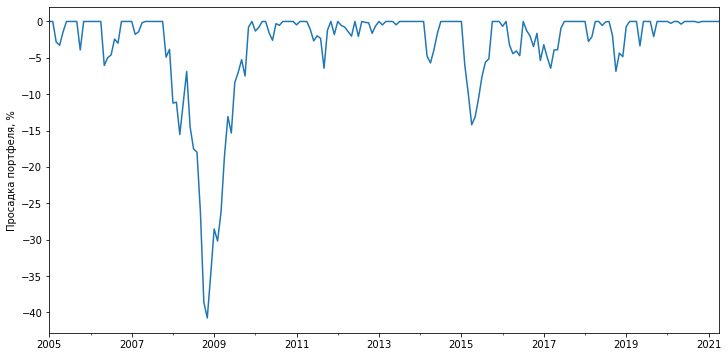

In [29]:
drawdowns_formated = port_aggr_no_infl.drawdowns * 100
drawdowns_formated.plot(figsize=(12,6), ylabel='Просадка портфеля, %')

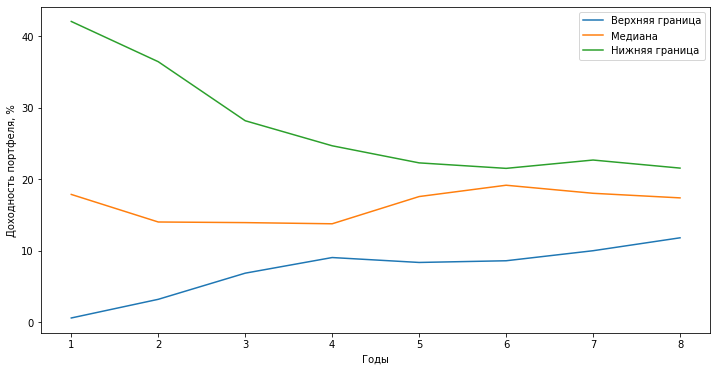

In [30]:
ax = plt.axes()
ax.set_xlabel('Годы')
ax.set_ylabel('Доходность портфеля, %')
ax.plot(port_aggr_no_infl.percentile_from_history(years=8)*100)
ax.legend(['Верхняя граница', 'Медиана', 'Нижняя граница'])

<Figure size 864x432 with 0 Axes>

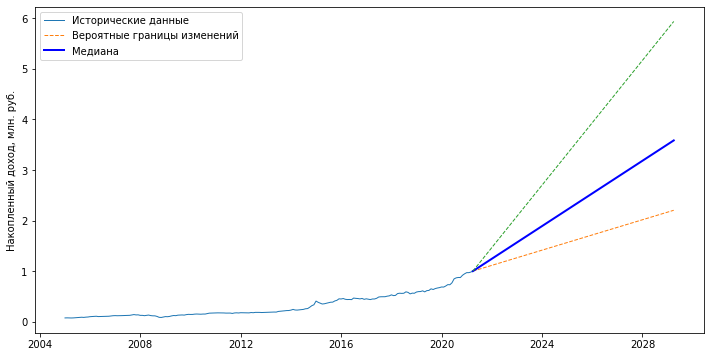

In [33]:
fig = plt.figure(figsize=(12,6))
port_aggr_no_infl.plot_forecast(years=8, n=1000, today_value=1, percentiles=[10,50,90])
ax = plt.gca()
ax.set_ylabel('Накопленный доход, млн. руб.')
ax.legend(['Исторические данные', 'Вероятные границы изменений', 'Медиана'])

In [50]:
port_aggr_no_infl.forecast_monte_carlo_cagr(distr='lognorm', years=1, percentiles=[12.2],n=5000000) # 12.2%

{12.2: -0.00011579147529264726}

#### Диверсифицировнный агрессивный

In [7]:
ls_classes = ['RGBITR.INDX', 'MCFTR.INDX', 'LQD.US', 'SPY.US', 'PGJ.US', 'GLD.US', 'REIT.INDX']
aggr_weights_classes=[0.06,          0.23,     0.05,     0.25,     0.20,     0.15,        0.06]
ls_aggr_div = ['SBGB.MOEX', 'RUSB.MOEX', 'VTBX.MOEX', 'VCIT.US', 'VCLT.US', 'VOO.US', 'VB.US', 'PGJ.US', 'VGK.US', 'INDY.US', 'GLDM.US' , 'SLV.US', 'VNQ.US', 'VNQI.US']
weights_aggr_giv = [   .03,         .03,         .20,       .02,       .03,      .12,     .10,      .17,       .05,       .04,        .12,      .03,     .03,        .03]
aggr_div = ok.Portfolio(ls_aggr_div, ccy=ccy, weights=weights_aggr_giv)
aggr_div.table

,asset name,ticker,weights
0,SBGB,SBGB.MOEX,0.0300
1,ITI Funds UCITS ETF SICAV - ITI Funds Russia-F...,RUSB.MOEX,0.0300
2,VTB-Indeks Mosbirzhi BPIFRFI,VTBX.MOEX,0.2000
3,Vanguard Intermediate-Term Corporate Bond Inde...,VCIT.US,0.0200
4,Vanguard Long-Term Corporate Bond Index Fund E...,VCLT.US,0.0300
5,Vanguard S&P 500 ETF,VOO.US,0.1200
6,Vanguard Small-Cap Index Fund ETF Shares,VB.US,0.1000
7,Invesco Golden Dragon China ETF,PGJ.US,0.1700
8,Vanguard FTSE Europe Index Fund ETF Shares,VGK.US,0.0500
9,iShares India 50 ETF,INDY.US,0.0400


In [40]:
aggr_div.dividend_yield

,RUB,USD
2020-04,0.0000,0.0002
2020-04,0.0000,0.0002
2020-04,0.0000,0.0002
2020-04,0.0000,0.0002
2020-04,0.0000,0.0002
...,...,...
2021-02,0.0000,0.0083
2021-02,0.0000,0.0083
2021-02,0.0000,0.0083
2021-02,0.0000,0.0083
